In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import hvplot.pandas

from scipy.stats import linregress
from pathlib import Path

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076


DANIK

Final Analysis: Based on the data provided, there is a weak correlation between energy consumption and temperature for all countries (outliers removed). The correlation is non-existant when all countries are included in the data. 

However, for countries with an average temperature of 10 or lower, there is a moderate to strong correlation. The next steps would be to seperate data based on continents, hemispheres, GDP.

In [3]:
%%capture --no-display

# Configure the map plot
map_plot_1 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Primary energy consumption per capita (kWh/person)", scale=0.07, color="Country")

#hvplot.show(map_plot_1)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Primary energy consumption per capita (kWh/person))

The r-squared is: 0.07426043111699936


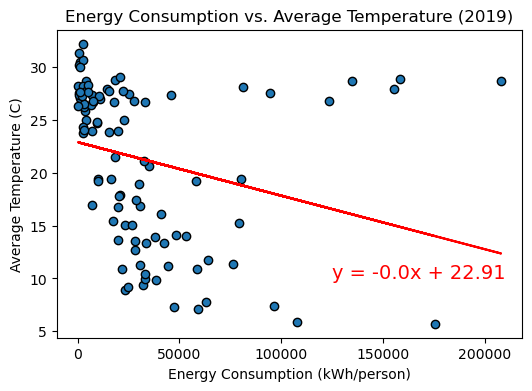

In [4]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019).png")

plt.show()

Analysis: The is a no/very weak correlation between energy consumption and average temperature with entire data.

In [5]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 25]
low_temps = main_data.loc[main_data['Average Temp'] <= 10]


The r-squared is: 0.0028583229372739416


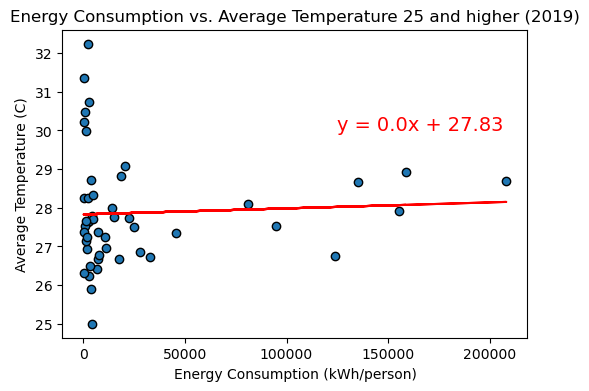

In [6]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 25 and higher (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 30), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 25 and higher (2019).png")

# Show plot
plt.show()

Analysis: There is no correlation between energy consumption and countries with average temperatures 25 and higher.

The r-squared is: 0.7053782565845196


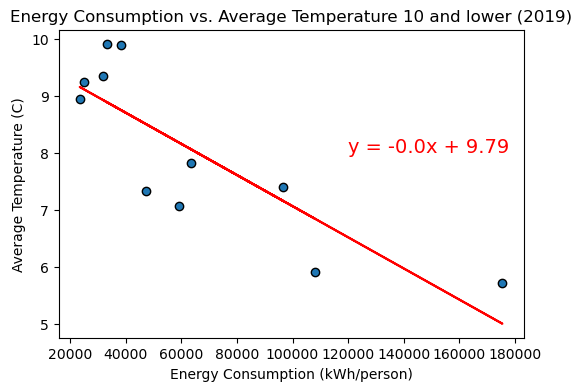

In [7]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 10 and lower (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (120000, 8), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 10 and lower (2019).png")

# Show plot
plt.show()

Analysis: There is a moderate/strong correlation between energy consumption and countries with an average temperature of 10 or lower.

In [8]:
#find outliers within the data
energyoutliers = main_data["Primary energy consumption per capita (kWh/person)"]
quartiles = energyoutliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

main_data_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] >= 88321.71742500001]
outliers = main_data_outliers['Country'].to_list()
print(f"{outliers} could be outliers.")

The lower quartile of temperatures is: 4599.5175500000005
The upper quartile of temperatures is: 38088.3975
The interquartile range of temperatures is: 33488.87995
The the median of temperatures is: 20460.55 
Values below -45633.802375 could be outliers.
Values above 88321.71742500001 could be outliers.
['Bahrain', 'Canada', 'Iceland', 'Kuwait', 'Norway', 'Qatar', 'Singapore', 'Trinidad and Tobago', 'United Arab Emirates'] could be outliers.


The r-squared is: 0.40616752081275864


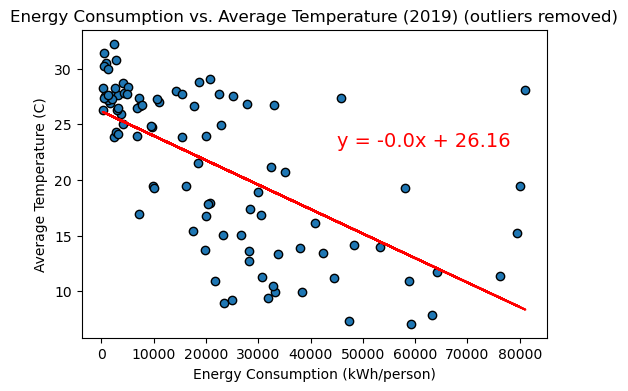

In [9]:
#remove outliers and complete new linear regression plot
main_data_no_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] < 88321.71742500001]

energy_consumption = main_data_no_outliers["Primary energy consumption per capita (kWh/person)"]
temperature = main_data_no_outliers["Average Temp"]

plt.figure(figsize=(6,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019) (outliers removed)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (45000,23), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019) - no outliers.png")

# Show plot
plt.show()

Analysis: There is a weak correlation between energy consumption and average temperature, after removing outliers.

KHADIJA

In [10]:
%%capture --no-display

# Configure the map plot
map_plot_2 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Low-carbon electricity (% electricity)", scale=2, color="Country")

#hvplot.show(map_plot_2)

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Low-carbon electricity (% electricity))

In [3]:
#Performe a code to analyse the relation between average temperature and  Renewable energy share in the total final energy consumption (%)

#to get just the 3 data informations :country ,Average Temp ,Renewable energy share in the total final energy consumption (%)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
print(result_df)

      Country  Average Temp  \
39    Iceland      5.715385   
14     Canada      5.912088   
28    Finland      7.070604   
26    Estonia      7.326648   
67     Norway      7.402473   
90     Sweden      7.812948   
49     Latvia      8.948485   
52  Lithuania      9.236264   
9     Belarus      9.339286   
42    Ireland      9.892857   

    Renewable energy share in the total final energy consumption (%)  
39                                              81.07                 
14                                              22.11                 
28                                              45.76                 
26                                              31.29                 
67                                              62.37                 
90                                              52.88                 
49                                              41.52                 
52                                              33.53                 
9                  

In [11]:

# Find the country with the highest temperature
country_with_highest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].max()]

# Get the low-carbon electricity percentage for the country with the highest temperature
low_carbon_percentage_highest_temp = country_with_highest_temp['Low-carbon electricity (% electricity)'].values[0]

# Find the country with the lowest temperature
country_with_lowest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].min()]

# Get the low-carbon electricity percentage for the country with the lowest temperature
low_carbon_percentage_lowest_temp = country_with_lowest_temp['Low-carbon electricity (% electricity)'].values[0]

# Print the results
print(f'The low carbon electricity percentage in the country with the highest temperature is {low_carbon_percentage_highest_temp:.2f}%')
print(f'The low carbon electricity percentage in the country with the lowest temperature is {low_carbon_percentage_lowest_temp:.2f}%')

The low carbon electricity percentage in the country with the highest temperature is 63.34%
The low carbon electricity percentage in the country with the lowest temperature is 100.00%


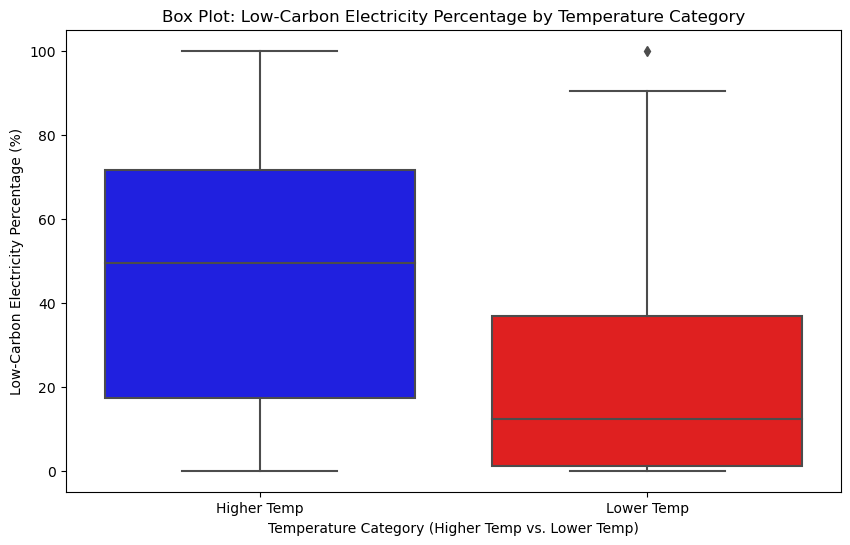

In [12]:
# Create a box plot to compare low-carbon electricity percentage by temperature category
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_data['Average Temp'] > 25, y=main_data['Low-carbon electricity (% electricity)'], palette=['blue', 'red'])
plt.xlabel('Temperature Category (Higher Temp vs. Lower Temp)')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Box Plot: Low-Carbon Electricity Percentage by Temperature Category')
plt.xticks([0, 1], ['Higher Temp', 'Lower Temp'])

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-BoxPlot.png")

plt.show()

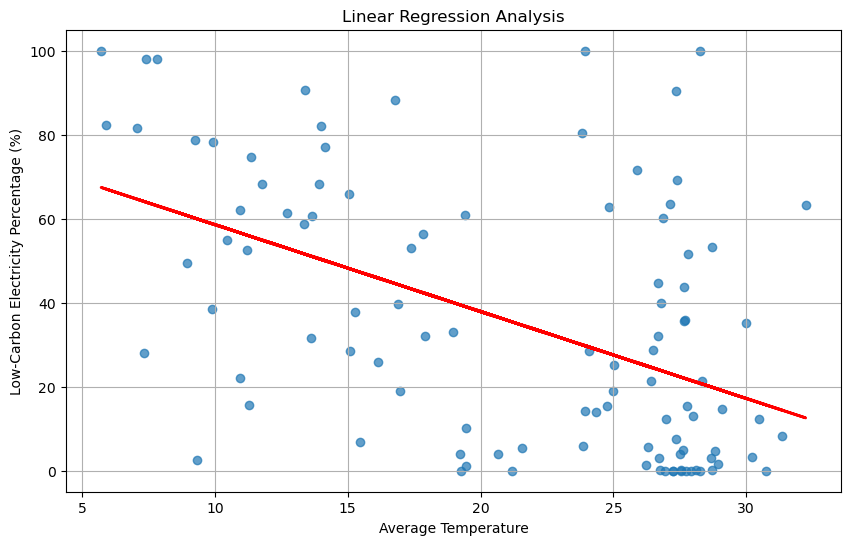

Slope (Coefficient): -2.0688
Intercept: 79.2755


In [13]:
# Define the independent variable (X) and dependent variable (y)
X = main_data['Average Temp']
y = main_data['Low-carbon electricity (% electricity)']

# Calculate the coefficients (slope and intercept) using numpy's polyfit
coefficients = np.polyfit(X, y, deg=1)

# Create the regression line
regression_line = coefficients[0] * X + coefficients[1]

# Plot the main_data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, regression_line, color='red', linewidth=2)
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Linear Regression Analysis')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-linear-regression.png")

plt.show()

# Print the coefficients
slope, intercept = coefficients
print(f'Slope (Coefficient): {slope:.4f}')
print(f'Intercept: {intercept:.4f}')


In [14]:
# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)

# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)

# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(20)


,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,39,Iceland,5.715385,81.07,0.00,0.00,19.12,100.000000,175527.73000,1640.0,64.963051,-19.020835,366669,142300.330711
1,14,Canada,5.912088,22.11,110.65,95.47,421.80,82.378334,107980.76000,580210.0,56.130366,-106.346771,37888705,23874.546036
2,28,Finland,7.070604,45.76,12.63,23.87,31.88,81.529690,59219.41800,40710.0,61.924110,25.748151,5529468,27098.805677
3,26,Estonia,7.326648,31.29,5.47,0.00,2.14,28.120895,47295.33600,10180.0,58.595272,25.013607,1329444,14798.710634
4,67,Norway,7.402473,62.37,2.76,0.00,131.07,97.937690,96392.50000,35950.0,60.472024,8.468946,5379839,60120.002250
5,90,Sweden,7.812948,52.88,3.35,66.13,98.94,98.010925,63283.47000,35000.0,60.128161,18.643501,10368969,33464.298936
6,49,Latvia,8.948485,41.52,3.25,0.00,3.19,49.534160,23394.70000,7570.0,56.879635,24.603189,1897052,9713.479440
7,52,Lithuania,9.236264,33.53,0.67,0.00,2.47,78.662415,24873.11700,11730.0,55.169438,23.881275,2820267,8339.956130
8,9,Belarus,9.339286,7.83,36.74,0.00,0.94,2.494692,31923.43600,57670.0,53.709807,27.953389,9633740,2499.605039
9,42,Ireland,9.892857,12.34,18.92,0.00,11.80,38.411460,38270.87500,35750.0,53.412910,-8.243890,4946119,4722.625975


In [15]:
#develop a code to analyse the relation between average temperature and  Renewable energy share in the total final energy consumption (%)
#to get just the 3 data informations :country ,Average Temp ,Renewable energy share in the total final energy consumption (%)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Renewable energy share in the total final energy consumption (%)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(10)

      Country  Average Temp  \
39    Iceland      5.715385   
14     Canada      5.912088   
28    Finland      7.070604   
26    Estonia      7.326648   
67     Norway      7.402473   
90     Sweden      7.812948   
49     Latvia      8.948485   
52  Lithuania      9.236264   
9     Belarus      9.339286   
42    Ireland      9.892857   

    Renewable energy share in the total final energy consumption (%)  
39                                              81.07                 
14                                              22.11                 
28                                              45.76                 
26                                              31.29                 
67                                              62.37                 
90                                              52.88                 
49                                              41.52                 
52                                              33.53                 
9                  

,Country,Average Temp,Renewable energy share in the total final energy consumption (%)
0,Iceland,5.715385,81.07
1,Canada,5.912088,22.11
2,Finland,7.070604,45.76
3,Estonia,7.326648,31.29
4,Norway,7.402473,62.37
5,Sweden,7.812948,52.88
6,Latvia,8.948485,41.52
7,Lithuania,9.236264,33.53
8,Belarus,9.339286,7.83
9,Ireland,9.892857,12.34


Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -9.2526
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 15.5854
Linear Regression for All Countries: Slope (Coefficient) = 0.58


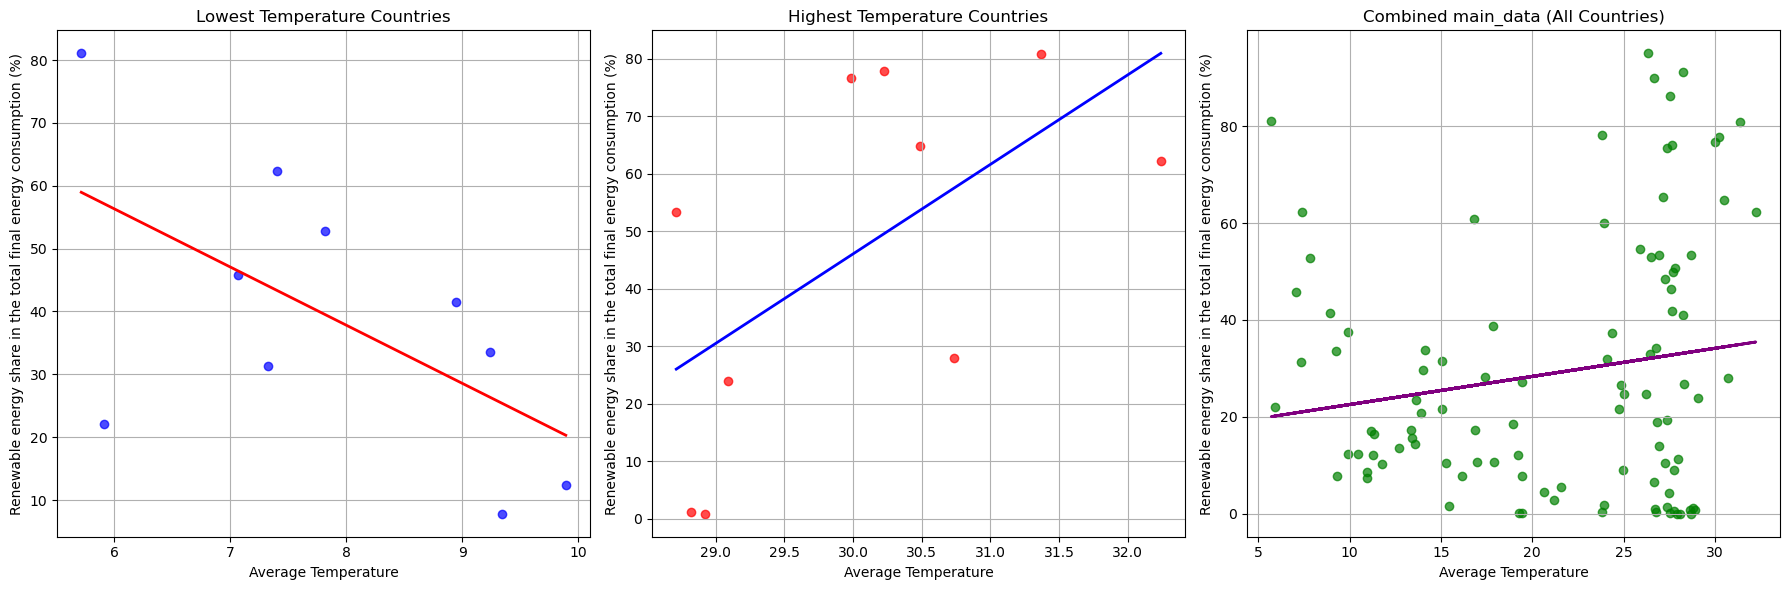

In [16]:
#Perform a code to visualize the scatter plot and linear regression about  relation between average temperature and  Renewable energy share in the total final energy consumption (%)
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)


# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)


# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Renewable energy share in the total final energy consumption (%)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Renewable energy share in the total final energy consumption (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Renewable energy share in the total final energy consumption (%)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()


In [17]:
#Develop a code to analyse the relation between average temperature and  Low-carbon electricity (% electricity) production
#To get just the 3 data informations :country ,Average Temp ,Low-carbon electricity (% electricity)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
print(result_df)

      Country  Average Temp  Low-carbon electricity (% electricity)
39    Iceland      5.715385                              100.000000
14     Canada      5.912088                               82.378334
28    Finland      7.070604                               81.529690
26    Estonia      7.326648                               28.120895
67     Norway      7.402473                               97.937690
90     Sweden      7.812948                               98.010925
49     Latvia      8.948485                               49.534160
52  Lithuania      9.236264                               78.662415
9     Belarus      9.339286                                2.494692
42    Ireland      9.892857                               38.411460
         Country  Average Temp  Low-carbon electricity (% electricity)
89         Sudan     32.239286                               63.335380
66         Niger     31.365934                                8.196721
22      Djibouti     30.737912         

Analysis : the coldest country are Iceland, canada,finland and others  are all Iceland, and the uses of Low carbon electricity pourcentage is very hight above belarus and estonia ,irland 

In [18]:
# Perform Linear Regression Analysis
# For Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)

# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.4f}")

# Show the plots
plt.tight_layout()
plt.show()

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.0688


<Figure size 640x480 with 0 Axes>

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.07


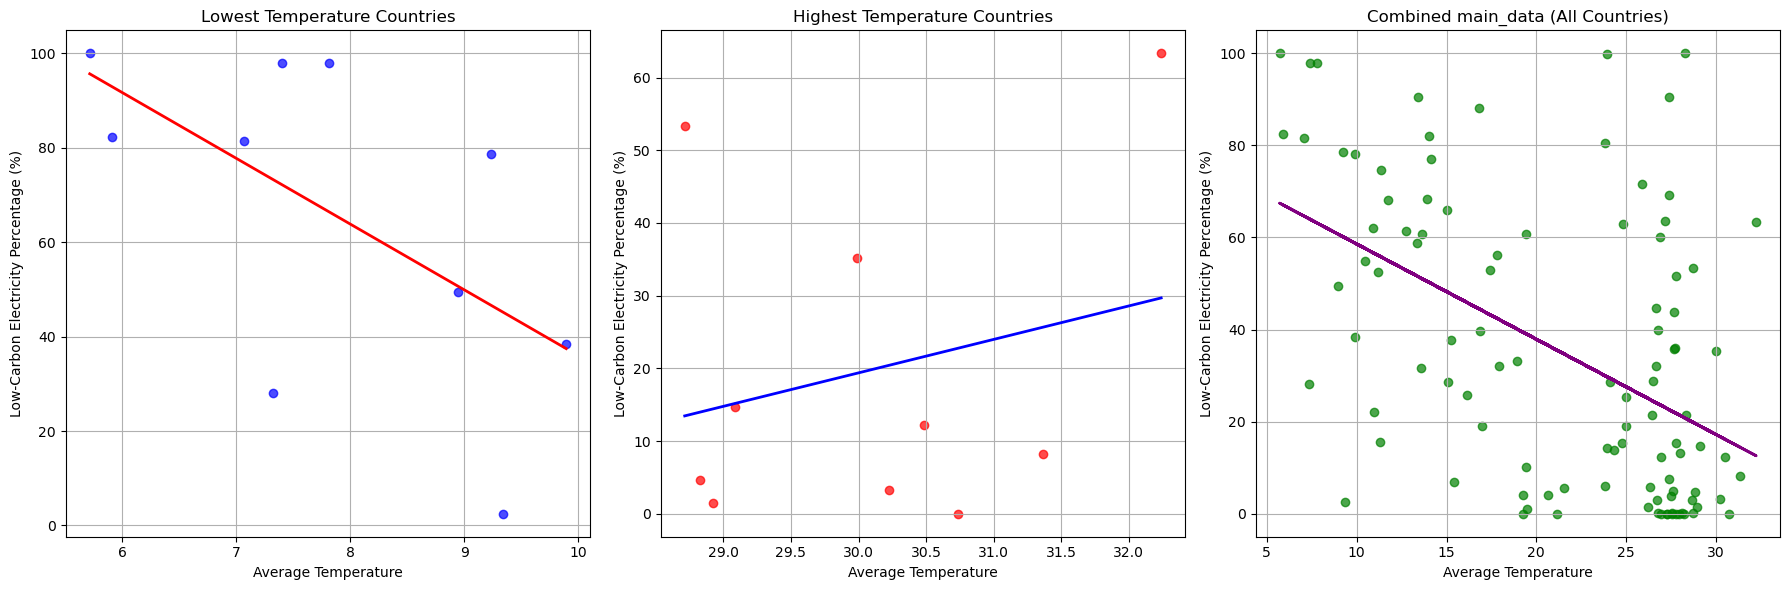

In [19]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)

# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)

# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

Analyse :the analysis indicates that temperature can be a factor influencing the choice of electricity sources in different countries. Colder countries(-13.93) tend to rely more on low-carbon electricity sources, while hotter countries (4.60) in this group tend to use more low-carbon electricity sources


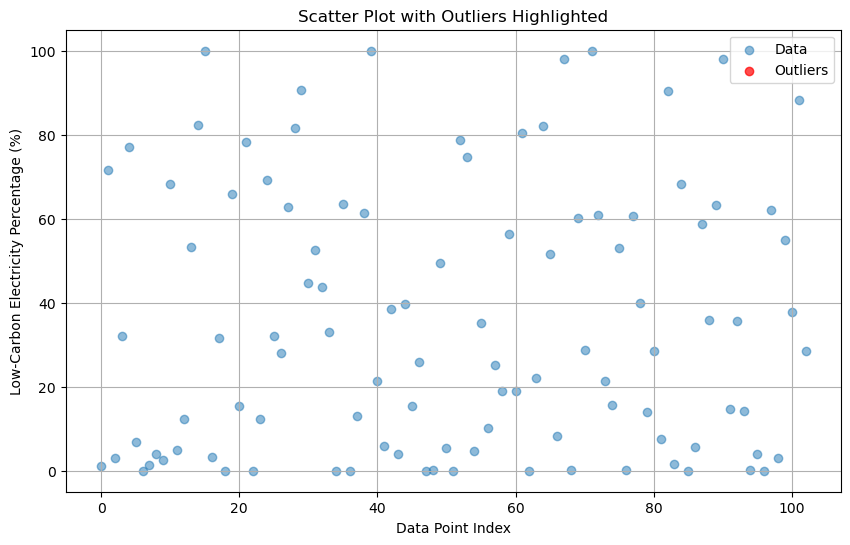

In [20]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = main_data['Low-carbon electricity (% electricity)'].quantile(0.25)
Q3 = main_data['Low-carbon electricity (% electricity)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = main_data[(main_data['Low-carbon electricity (% electricity)'] < lower_bound) | (main_data['Low-carbon electricity (% electricity)'] > upper_bound)]

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(main_data.index, main_data['Low-carbon electricity (% electricity)'], label='Data', alpha=0.5)
plt.scatter(outliers.index, outliers['Low-carbon electricity (% electricity)'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Scatter Plot with Outliers Highlighted.png")

# Show the plot
plt.show()


there are no outliers in this dataset

Yosieph

In [21]:
# Calculate average CO2 emissions per country
co2_emissions_by_country =main_data.groupby('Country')['co2 Emissions (metric tons per capita)'].mean()
co2_emissions_by_country

Country
Algeria                  171250.0
Angola                    25210.0
Antigua and Barbuda         520.0
Argentina                168100.0
Austria                   64770.0
                          ...    
United Arab Emirates     188860.0
United Kingdom           348920.0
United States           4817720.0
Uruguay                    6490.0
Vanuatu                     210.0
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [22]:
# Set your CO2 emissions threshold

threshold = 33200000000

main_data['co2-emission catagory'] = ['High' if x > threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,Low
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,Low
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,Low
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,Low
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,Low
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,Low
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,Low
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,Low


In [23]:
main_data['co2 Emissions (metric tons per capita)']

0       171250.0
1        25210.0
2          520.0
3       168100.0
4        64770.0
         ...    
98      188860.0
99      348920.0
100    4817720.0
101       6490.0
102        210.0
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [24]:
main_data['co2-emission catagory'].unique()

array(['Low'], dtype=object)

In [25]:
low_co2_avg = main_data[main_data['co2-emission catagory'] == 'Low']['Low-carbon electricity (% electricity)'].mean()
high_co2_avg = main_data[main_data['co2-emission catagory'] == 'High']['Low-carbon electricity (% electricity)'].mean()



# Print the results
print(f'Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: {low_co2_avg}')
print(f'Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: {high_co2_avg}')

Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: 35.25776505116505
Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: nan


In [26]:
# Set your CO2 emissions threshold

threshold = 4.2637648

main_data['co2-emission catagory'] = ['High' if x > threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,High
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,High
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,High
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,High
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,High
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,High
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,High
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,High


In [27]:
# Set x axis and tick locations
x_axis = np.arange(len(main_data))
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x21301492350>,
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Antigua and Barbuda'),
  Text(3, 0, 'Argentina'),
  Text(4, 0, 'Austria'),
  Text(5, 0, 'Azerbaijan'),
  Text(6, 0, 'Bahrain'),
  Text(7, 0, 'Bangladesh'),
  Text(8, 0, 'Barbados'),
  Text(9, 0, 'Belarus'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Benin'),
  Text(12, 0, 'Burkina Faso'),
  Text(13, 0, 'Cambodia'),
  Text(14, 0, 'Canada'),
  Text(15, 0, 'Central African Republic'),
  Text(16, 0, 'Chad'),
  Text(17, 0, 'China'),
  Text(18, 0, 'Comoros'),
  Text(19, 0, 'Croatia'),
  Text(20, 0, 'Cuba'),
  Text(21, 0, 'Denmark'),
  Text(22, 0, 'Djibouti'),
  Text(23, 0, 'Dominican Republic'),
  Text(24, 0, 'El Salvador'),
  Text(25, 0, 'Equatorial Guinea'),
  Text(26, 0, 'Estonia'),
  Text(27, 0, 'Fiji'),
  Text(28, 0, 'Finland'),
  Text(29, 0, 'France'),
  Text(30, 0, 'Gabon'),
  Text(31, 0, 'Germany'),
  Text(32, 0, 'Ghana'),
  Text(33, 0, 'Greece'),
  Text(34, 0, 'Grenada'),
  Text(

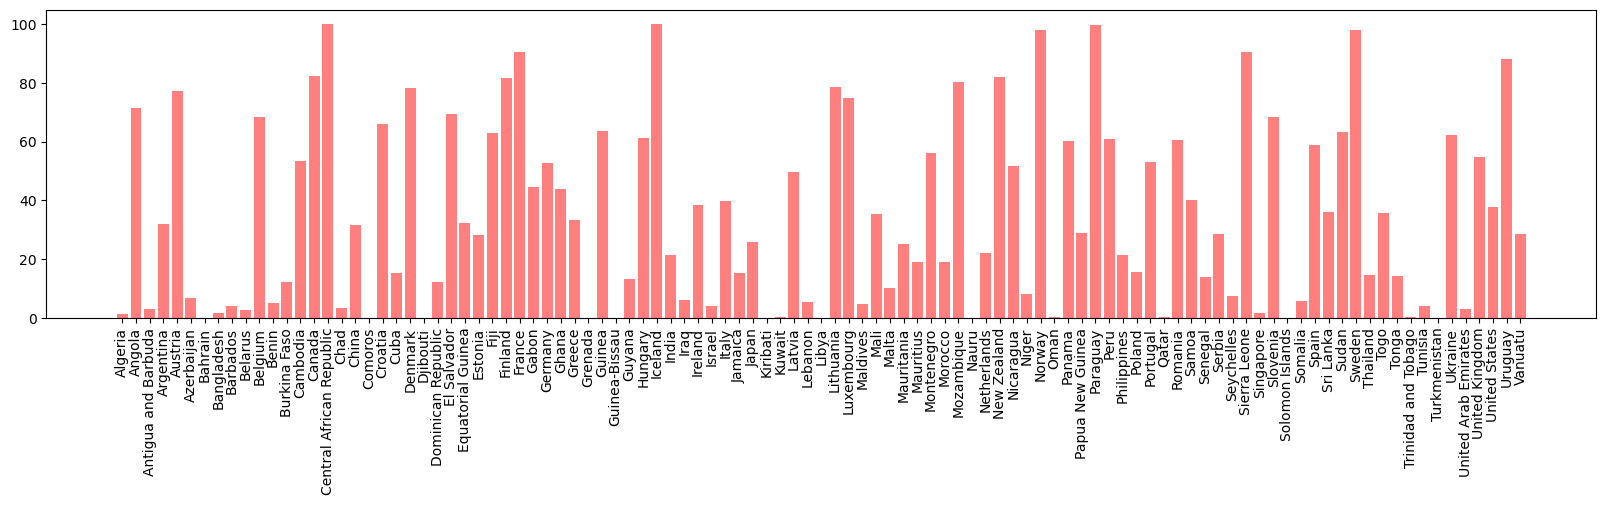

In [28]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, main_data["Low-carbon electricity (% electricity)"], color='r', alpha=0.5, align="center" )
plt.xticks(tick_locations, main_data["Country"], rotation="vertical")

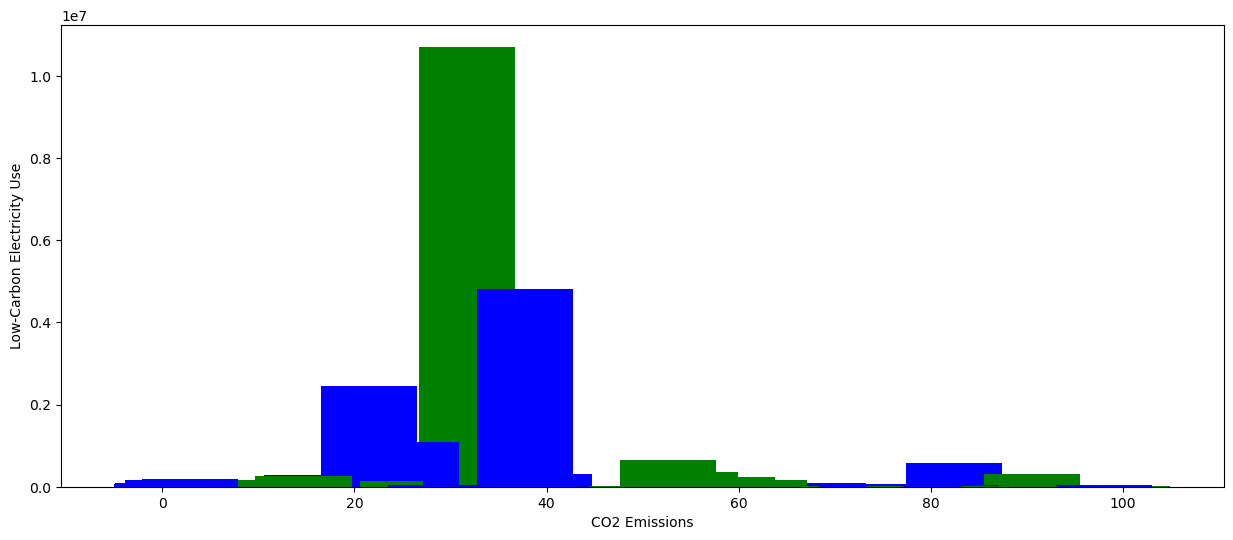

In [29]:

plt.figure(figsize=(15,6))
plt.bar(main_data['Low-carbon electricity (% electricity)'],main_data['co2 Emissions (metric tons per capita)'] ,width=10 ,color=['blue','green'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.show()

In [30]:
main_data.values

array([[0, 'Algeria', 19.45521978021977, ..., 43451666, 26.0144848,
        'High'],
       [1, 'Angola', 25.89010989010988, ..., 33428485, 2005.71407622,
        'High'],
       [2, 'Antigua and Barbuda', 26.725274725274737, ..., 92664,
        300.55039560000006, 'High'],
       ...,
       [100, 'United States', 15.26043956043955, ..., 335942003,
        8282.7554672, 'High'],
       [101, 'Uruguay', 16.787637362637355, ..., 3429086,
        12142.892075999998, 'High'],
       [102, 'Vanuatu', 24.085439560439585, ..., 311685, 1005.01468362,
        'High']], dtype=object)

In [31]:
main_data.index

RangeIndex(start=0, stop=103, step=1)

Text(0.5, 1.0, 'Relationship between CO2 Emissions and Low-Carbon Electricity Use')

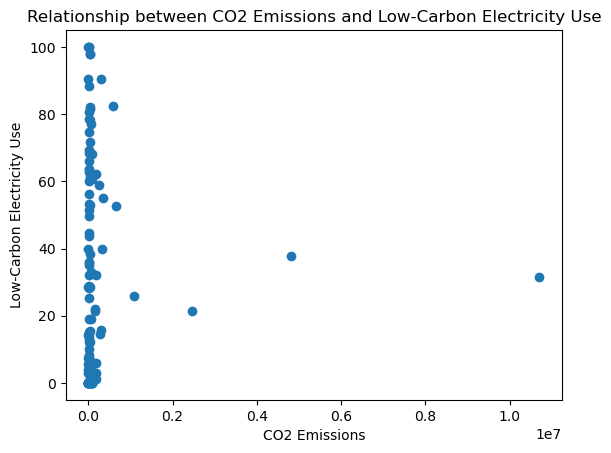

In [32]:
# Create a scatter plot
plt.scatter(main_data['co2 Emissions (metric tons per capita)'], main_data['Low-carbon electricity (% electricity)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.title('Relationship between CO2 Emissions and Low-Carbon Electricity Use')

In [33]:
category_means = main_data.groupby('co2 Emissions (metric tons per capita)')['Low-carbon electricity (% electricity)'].mean()
category_means

co2 Emissions (metric tons per capita)
60.0            0.000000
90.0            0.000000
160.0          14.285714
210.0          28.571428
240.0         100.000000
                 ...    
657400.0       52.611385
1081570.0      25.860157
2456300.0      21.475914
4817720.0      37.759180
10707220.0     31.672895
Name: Low-carbon electricity (% electricity), Length: 101, dtype: float64

In [34]:
y=category_means.index
y

Float64Index([      60.0,       90.0,      160.0,      210.0,      240.0,
                   300.0,      320.0,      330.0,      360.0,      420.0,
              ...
                295130.0,   300520.0,   317240.0,   348920.0,   580210.0,
                657400.0,  1081570.0,  2456300.0,  4817720.0, 10707220.0],
             dtype='float64', name='co2 Emissions (metric tons per capita)', length=101)

In [35]:
x=category_means.values
x

array([0.00000000e+00, 0.00000000e+00, 1.42857140e+01, 2.85714280e+01,
       1.00000000e+02, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94117640e+00, 7.54717000e+00,
       5.71428600e+00, 9.04762000e+01, 3.92156860e+00, 6.28318600e+01,
       1.00000000e+02, 1.01449280e+01, 4.68750000e+00, 8.19672100e+00,
       3.22580650e+00, 3.57142870e+01, 5.62682200e+01, 1.31147540e+01,
       4.44334805e+01, 1.90938510e+01, 1.22093020e+01, 5.15625000e+01,
       4.46902660e+01, 3.21428570e+01, 3.52409630e+01, 8.82243040e+01,
       5.00000000e+00, 8.04917200e+01, 4.95341600e+01, 2.88288290e+01,
       6.92821400e+01, 9.98573150e+01, 1.52941180e+01, 7.47663500e+01,
       2.81208950e+01, 1.39264980e+01, 7.86624150e+01, 6.00577470e+01,
       6.83448700e+01, 5.33727870e+01, 6.59557700e+01, 1.15740740e-01,
       4.38585970e+01, 6.33353800e+01, 3.59345470e+01, 7.15584400e+01,
       1.53097790e+01, 1.22470150e+01, 5.50098230e+00, 7.81768900e+01,
      

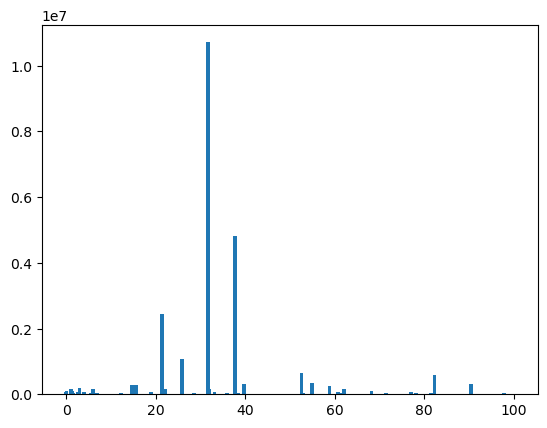

In [36]:
plt.bar(category_means.values, category_means.index)
plt.show()

In [37]:
print(type (category_means))

<class 'pandas.core.series.Series'>


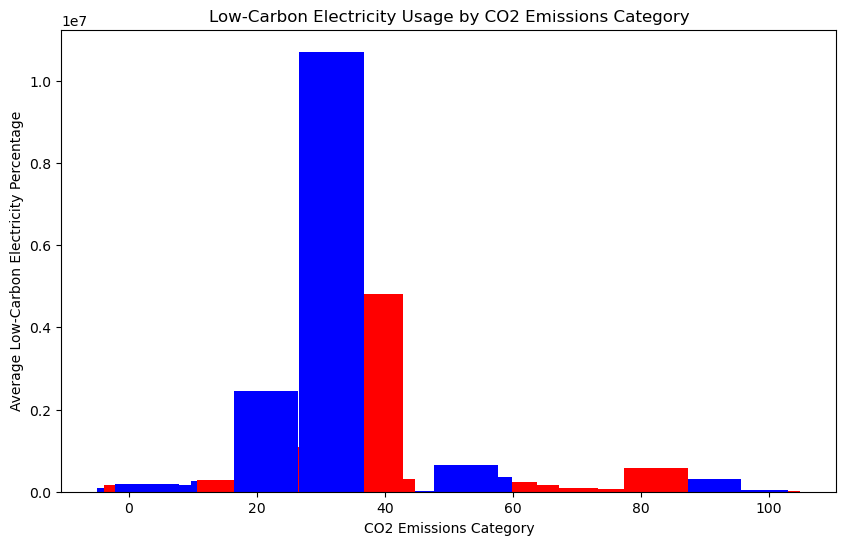

In [38]:
# Create a bar graph

plt.figure(figsize=(10,6))
plt.bar(x,y , width=10 ,color=['blue','red'])
plt.xlabel('CO2 Emissions Category')
plt.ylabel('Average Low-Carbon Electricity Percentage')
plt.title('Low-Carbon Electricity Usage by CO2 Emissions Category')





plt.show()

In [39]:
# Set your CO2 emissions threshold

threshold = 4.2637648

main_data['co2-emission catagory2'] = ['High' if x < threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory,co2-emission catagory2
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,High,Low
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,High,Low
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,High,Low
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,High,Low
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,High,Low
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,High,Low
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,High,Low
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,High,Low


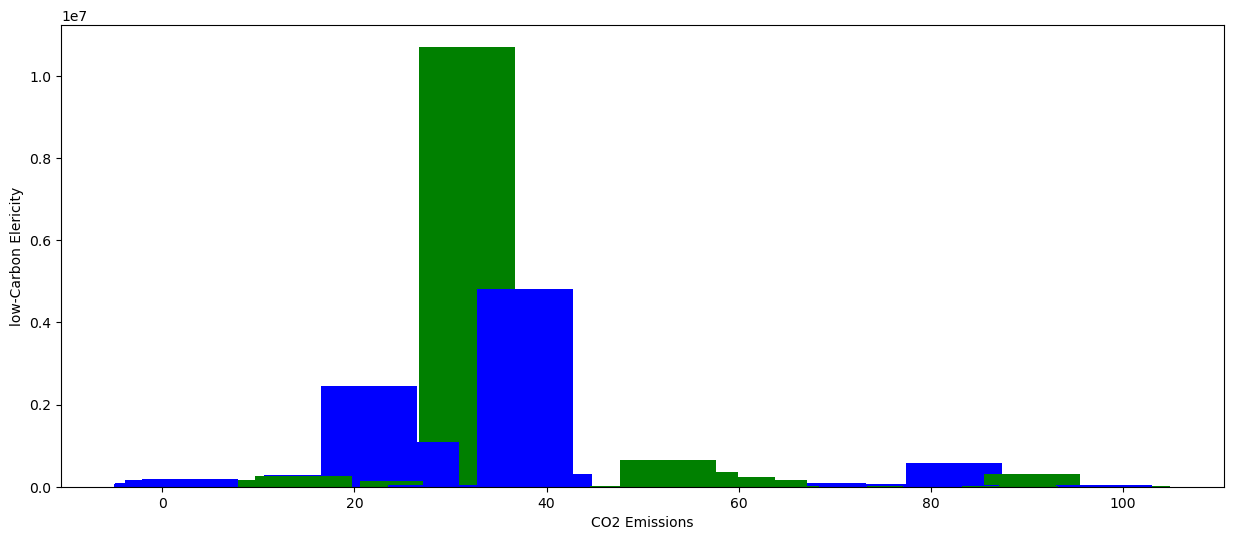

In [40]:
plt.figure(figsize=(15,6))
plt.bar(main_data['Low-carbon electricity (% electricity)'],main_data['co2 Emissions (metric tons per capita)'] ,width=10 ,color=['blue','green'])
plt.xlabel('CO2 Emissions')
plt.ylabel('low-Carbon Elericity')
plt.show()